### START HERE IF SOURCING FROM df_manual_FOR_training
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


# Descriptives and visualization


In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

In [3]:
try:
    df_sectors_all = pd.read_pickle(f'{table_save_path}Sectors Output from script.pkl')
except FileNotFoundError:
    cbs_notebook = '\\'.join(f'{scraped_data}CBS/CBS.ipynb')
    %run $cbs_notebook import df_sectors_all # type:ignore # isort:skip # fmt:skip # noqa # nopep8


# Functions

In [4]:
def show_and_close_plots():
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()


In [5]:
def close_plots():
    plt.clf()
    plt.cla()
    plt.close()


# Descriptives

### READ DATA

In [6]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_training.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')


Dataframe loaded with shape: (5947, 68)


In [7]:
with open(f'{data_dir}df_jobs_len.txt', 'r') as f:
    df_jobs_len = int(f.read())

df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_for_analysis.pkl')
assert len(df_jobs) == df_jobs_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_jobs_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_jobs.shape}')


Dataframe loaded with shape: (307300, 79)


In [8]:
dataframes = {
    'df_manual': df_manual,
    'df_jobs': df_jobs,
}


### All info

In [9]:
# All info
analysis_columns = [
    'Warmth',
    'Competence'
]

for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    df = categorize_df_gender_age(df)

    df.info()


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5947 non-null   object  
 1   Job Description spacy_sentencized                 5947 non-null   object  
 2   Warmth                                            5947 non-null   int64   
 3   Competence                                        5947 non-null   int64   
 4   Dutch Requirement in Sentence                     5947 non-null   object  
 5   English Requirement in Sentence                   5947 non-null   object  
 6   Dutch Requirement in Sentence_No                  5947 non-null   int64   
 7   Dutch Requirement in Sentence_Yes                 5947 non-null   int64   
 8   English Requirement in Sentence_No 

## Sentence Level

### All Gender and Age info at Sentence Level

In [10]:
# Gender and Age info by sentence
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Gender and Age info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=ivs_all)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Gender and Age info at Sentence Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5947 non-null   object  
 1   Job Description spacy_sentencized                 5947 non-null   object  
 2   Warmth                                            5947 non-null   int64   
 3   Competence                                        5947 non-null   int64   
 4   Dutch Requirement in Sentence                     5947 non-null   object  
 5   English Requirement in Sentence                   5947 non-null   object  
 6   Dutch Requirement in Sentence_No                  5947 non-null   int64   
 7   Dutch Requirement in Sentence_Yes  

### % Gender and Age info at Sentence Level

In [11]:
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    for iv_perc in ivs_perc:
        min_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].min()].values[0]
        max_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].max()].values[0]
        mean = df[iv_perc].mean().round(2).astype(float)
        std = df[iv_perc].std().round(2).astype(float)
        print(f'{iv_perc}:\nMin Sector: {df[iv_perc].min():.1f}% in {min_sector}\nMax Sector: {df[iv_perc].max():.1f}% in {max_sector}\nMean: {mean}\nStandard Deviation: {std}\n')
        print('-'*20)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Gender_Female_% per Sector:
Min Sector: 19.4% in Water supply and waste management
Max Sector: 84.3% in Health and social work activities
Mean: 45.15
Standard Deviation: 15.88

--------------------
Gender_Male_% per Sector:
Min Sector: 15.6% in Health and social work activities
Max Sector: 80.6% in Water supply and waste management
Mean: 54.83
Standard Deviation: 15.91

--------------------
Age_Older_% per Sector:
Min Sector: 18.9% in Accommodation and food serving
Max Sector: 58.3% in Water supply and waste management
Mean: 38.12
Standard Deviation: 8.74

--------------------
Age_Younger_% per Sector:
Min Sector: 44.4% in Water supply and waste management
Max Sector: 80.8% in Accommodation and food serving
Mean: 61.63
Standard Deviation: 8.82

--------------------
++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

Gender_Female_% per Sector:
Min Sector: 12.5% in Construction
Max Sector: 84.3% in Health and social work activities
Mea

### All Warmth and Competence info at Sentence Level

In [12]:
# Warmth and Competence percentages info by sentence
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Warmth and Competence info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=dvs_all)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Warmth and Competence info at Sentence Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5947 non-null   object  
 1   Job Description spacy_sentencized                 5947 non-null   object  
 2   Warmth                                            5947 non-null   int64   
 3   Competence                                        5947 non-null   int64   
 4   Dutch Requirement in Sentence                     5947 non-null   object  
 5   English Requirement in Sentence                   5947 non-null   object  
 6   Dutch Requirement in Sentence_No                  5947 non-null   int64   
 7   Dutch Requirement in Sentenc

## Job Ad Level

### All Gender and Age info at Job Ad Level

In [13]:
# Gender and Age info by job ad
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Gender and Age info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all=ivs_all)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Gender and Age info at Job Advertisement Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 3768944208 to pj_a4ac3e531abef752
Data columns (total 67 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job Description spacy_sentencized                 117 non-null    object  
 1   Warmth                                            117 non-null    int64   
 2   Competence                                        117 non-null    int64   
 3   Dutch Requirement in Sentence                     117 non-null    object  
 4   English Requirement in Sentence                   117 non-null    object  
 5   Dutch Requirement in Sentence_No                  117 non-null    int64   
 6   Dutch Requirement in Sentence_Yes                 117 non-null    int64   
 7   English 

### % Gender and Age info at Job Ad Level

In [14]:
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')
    df = df.groupby(['Job ID']).first()

    for iv_perc in ivs_perc:
        min_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].min()].values[0]
        max_sector = df['Sector'].loc[df[iv_perc] == df[iv_perc].max()].values[0]
        mean = df[iv_perc].mean().round(2).astype(float)
        std = df[iv_perc].std().round(2).astype(float)
        print(f'{iv_perc}:\nMin Sector: {df[iv_perc].min():.1f}% in {min_sector}\nMax Sector: {df[iv_perc].max():.1f}% in {max_sector}\nMean: {mean}\nStandard Deviation: {std}\n')
        print('-'*20)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Gender_Female_% per Sector:
Min Sector: 19.4% in Water supply and waste management
Max Sector: 84.3% in Health and social work activities
Mean: 44.39
Standard Deviation: 16.17

--------------------
Gender_Male_% per Sector:
Min Sector: 15.6% in Health and social work activities
Max Sector: 80.6% in Water supply and waste management
Mean: 55.59
Standard Deviation: 16.19

--------------------
Age_Older_% per Sector:
Min Sector: 18.9% in Accommodation and food serving
Max Sector: 58.3% in Water supply and waste management
Mean: 38.68
Standard Deviation: 9.05

--------------------
Age_Younger_% per Sector:
Min Sector: 44.4% in Water supply and waste management
Max Sector: 80.8% in Accommodation and food serving
Mean: 61.05
Standard Deviation: 9.18

--------------------
++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

Gender_Female_% per Sector:
Min Sector: 12.5% in Construction
Max Sector: 84.3% in Health and social work activities
Mea

### All Warmth and Competence info at Job Ad Level

In [15]:
# Warmth and Competence info by job ad
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Warmth and Competence info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all=dvs_all)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Warmth and Competence info at Job Advertisement Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 3768944208 to pj_a4ac3e531abef752
Data columns (total 67 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job Description spacy_sentencized                 117 non-null    object  
 1   Warmth                                            117 non-null    int64   
 2   Competence                                        117 non-null    int64   
 3   Dutch Requirement in Sentence                     117 non-null    object  
 4   English Requirement in Sentence                   117 non-null    object  
 5   Dutch Requirement in Sentence_No                  117 non-null    int64   
 6   Dutch Requirement in Sentence_Yes                 117 non-null    int64   
 7   E

# Controls

## Sentence Level

### Controls all info at Sentence Level

In [16]:
# Control variables info by sentence
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Control varibales info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all = controls)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Control varibales info at Sentence Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5947 non-null   object  
 1   Job Description spacy_sentencized                 5947 non-null   object  
 2   Warmth                                            5947 non-null   int64   
 3   Competence                                        5947 non-null   int64   
 4   Dutch Requirement in Sentence                     5947 non-null   object  
 5   English Requirement in Sentence                   5947 non-null   object  
 6   Dutch Requirement in Sentence_No                  5947 non-null   int64   
 7   Dutch Requirement in Sentence_Ye

### All info % Sector per Workforce at Sentence Level

In [17]:
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Sector info at Sentence Level')
    print('-'*30)
    get_df_info(df, ivs_all=['% Sector per Workforce'])
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Sector info at Sentence Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job ID                                            5947 non-null   object  
 1   Job Description spacy_sentencized                 5947 non-null   object  
 2   Warmth                                            5947 non-null   int64   
 3   Competence                                        5947 non-null   int64   
 4   Dutch Requirement in Sentence                     5947 non-null   object  
 5   English Requirement in Sentence                   5947 non-null   object  
 6   Dutch Requirement in Sentence_No                  5947 non-null   int64   
 7   Dutch Requirement in Sentence_Yes          

### % Sector per Workforce at Sentence Level

In [18]:
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    min_sector = df['Sector'].loc[df['% Sector per Workforce'] == df['% Sector per Workforce'].min()].values[0]
    max_sector = df['Sector'].loc[df['% Sector per Workforce'] == df['% Sector per Workforce'].max()].values[0]
    mean = df['% Sector per Workforce'].mean().round(2).astype(float)
    std = df['% Sector per Workforce'].std().round(2).astype(float)
    print(f'"% Sector per Workforce":\nMin Sector: {df["% Sector per Workforce"].min():.1f}% in {min_sector}\nMax Sector: {df["% Sector per Workforce"].max():.1f}% in {max_sector}\nMean: {mean}\nStandard Deviation: {std}\n')
    print('-'*20)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

"% Sector per Workforce":
Min Sector: 0.1% in Energy supply
Max Sector: 31.4% in Commercial services
Mean: 4.47
Standard Deviation: 5.29

--------------------
++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

"% Sector per Workforce":
Min Sector: 0.1% in Energy supply
Max Sector: 31.4% in Commercial services
Mean: 5.42
Standard Deviation: 8.77

--------------------


## Job Ad Level

### All Controls info at Job Ad Level

In [19]:
# Control variables info by job ad
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    print('='*30)
    print('Control varibales info at Job Advertisement Level')
    print('-'*30)
    get_df_info(df.groupby(['Job ID']).first(), ivs_all = controls)
    print('-'*30)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Control varibales info at Job Advertisement Level
------------------------------

DF INFO:

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 3768944208 to pj_a4ac3e531abef752
Data columns (total 67 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Job Description spacy_sentencized                 117 non-null    object  
 1   Warmth                                            117 non-null    int64   
 2   Competence                                        117 non-null    int64   
 3   Dutch Requirement in Sentence                     117 non-null    object  
 4   English Requirement in Sentence                   117 non-null    object  
 5   Dutch Requirement in Sentence_No                  117 non-null    int64   
 6   Dutch Requirement in Sentence_Yes                 117 non-null    int64   
 7   Engli

## Imbalance Ratios

In [20]:
# Imbalance Ratio
all_imbalance_ratio_dict = {}
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    warmth_imbalance_ratio = df['Warmth'].loc[
        df['Warmth'] == 1].count()/df['Warmth'].loc[df['Warmth'] == 0
    ].count()
    competence_imbalance_ratio = df['Competence'].loc[
        df['Competence'] == 1].count()/df['Competence'].loc[df['Competence'] == 0
    ].count()

    all_imbalance_ratio_dict[f'{df_name} Warmth'] = warmth_imbalance_ratio
    all_imbalance_ratio_dict[f'{df_name} Competence'] = competence_imbalance_ratio

    print('='*20)
    print('Imabalance Ratios')
    print('-'*10)
    print(f'Warmth IR: {warmth_imbalance_ratio:.2f}')
    print(f'Competence IR: {competence_imbalance_ratio:.2f}')
    print('='*20)


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

Imabalance Ratios
----------
Warmth IR: 0.37
Competence IR: 0.87
++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

Imabalance Ratios
----------
Warmth IR: 0.45
Competence IR: 1.07


# Plotting

++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++



++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



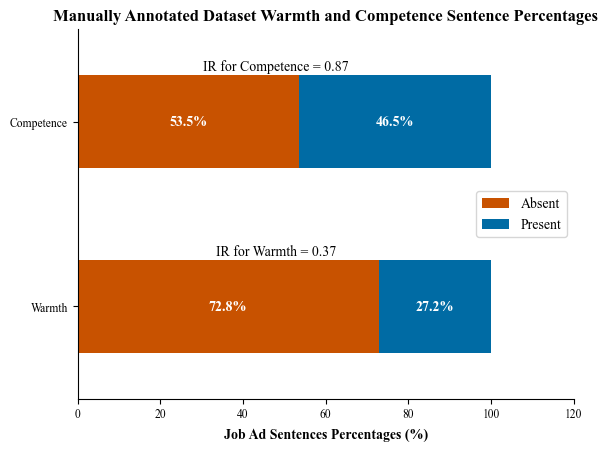

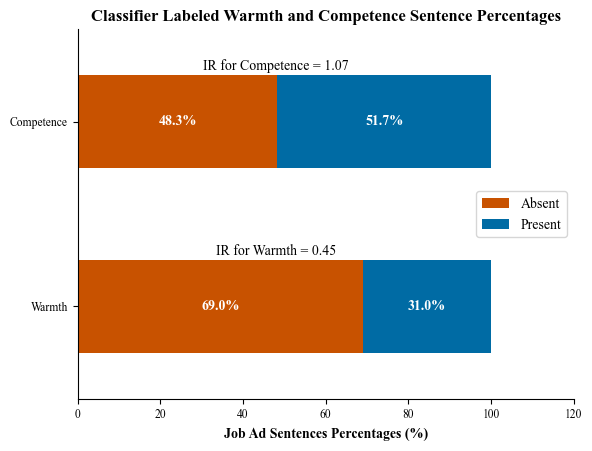

In [21]:
# Ploting Warmth and Competence
close_plots()
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    dfs_to_transpose = [
        df[dv]
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
        .astype(float)
        .to_frame()
        .transpose()
        .set_index(pd.Index([dv]))
        for dv in dvs
    ]

    df_warm_comp_transposed = pd.concat(dfs_to_transpose)

    fig, ax = plt.subplots()
    ax.set_title(f'{title_prefix} Warmth and Competence Sentence Percentages')

    df_warm_comp_transposed.plot(
        kind='barh', legend=True, stacked=True, ax=ax, color=['C5', 'C0'],
    )
    ax.legend(['Absent', 'Present'])

    for container in ax.containers:
        labels = [f'{width:.1f}%' for v in container if float(width := v.get_width())]
        ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')    
        ax.set_xlabel('Job Ad Sentences Percentages (%)')

    for i, tick_label in enumerate(ax.get_ymajorticklabels()):
        ax.annotate(
            f'IR for {tick_label.get_text()} = {all_imbalance_ratio_dict[f"{df_name} {tick_label.get_text()}"]:.2f}',
            xy=(48, 0.3+i), ha='center', va='center'
        )

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Warmth and Competence Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )


In [22]:
# Plotting imbalanced scatter plot
close_plots()
NUMBER_OF_CLUSTERS = 2
text_col = 'Job Description spacy_sentencized'
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'
        continue

    for dv in dvs:

        print(f'{"-"*20} {dv.upper()} {"-"*20}\n')
        vectorizer = TfidfVectorizer(stop_words='english')
        X = vectorizer.fit_transform(list(np.array(df[text_col].astype('str').values)))
        y = column_or_1d(df[dv].astype('int64').values.tolist(), warn=True)

        km = KMeans(
            n_clusters=NUMBER_OF_CLUSTERS, 
            init='k-means++', 
            max_iter=500)
        km.fit(X)

        # First: for every document we get its corresponding cluster
        clusters = km.predict(X)

        # We train the PCA on the dense version of the tf-idf. 
        pca = PCA(n_components=2)
        two_dim = pca.fit_transform(np.asarray(X.todense()))

        scatter_x = two_dim[:, 0] # first principle component
        scatter_y = two_dim[:, 1] # second principle component


        fig, ax = plt.subplots()
        fig.set_size_inches(20,10)
        fig.suptitle(f'{title_prefix} {dv} Sentence Clusters', fontsize=20)

        # group by clusters and scatter plot every cluster
        # with a colour and a label
        for group in np.unique(clusters):
            ix = np.where(clusters == group)
            ax.scatter(scatter_x[ix], scatter_y[ix], c={0: 'C0', 1: 'C5'}[group], label=group)

        ax.legend(title='Cluster')
        plt.xlabel('PCA 0')
        plt.ylabel('PCA 1')
        # plt.show()

        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

        terms = vectorizer.get_feature_names_out()
        for i in range(2):
            print(f'{"="*10}')
            print(f'Cluster {i}:')
            print(f'{"-"*10}')
            for ind in order_centroids[i, :10]:
                print(f' {terms[ind]}')
            print(f'{"="*10}')

        show_and_close_plots()

        for image_save_format in ['eps', 'png', 'svg']:
            fig.savefig(
                f'{plot_save_path}{df_name} - {title_prefix} {dv} Sentence Clusters.{image_save_format}',
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )


++++++++++++++++++++ DF_MANUAL ++++++++++++++++++++

-------------------- WARMTH --------------------



/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Ploting Categorical Gender and Age
close_plots()
color_dict = {
    'Female': 'C5', 'Mixed Gender': 'C2', 'Male': 'C0',
    'Older': 'C5', 'Mixed Age': 'C2', 'Younger': 'C0'
}
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

    fig, axs = plt.subplots(1, 2)
    fig.suptitle(f'{title_prefix} Categorical Gender and Age Sentence Percentages')

    # Gender
    df_gender_transposed = df['Gender'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().transpose().set_index(pd.Index(['Gender']))
    gender_colors = [color_dict[col] for col in df_gender_transposed.columns]
    df_gender_transposed.plot(
        kind='bar', legend=True, stacked=True, ax=axs[0], color=gender_colors
    )

    # Age
    df_age_transposed = df['Age'].value_counts(normalize=True).mul(100).round(2).astype(float).to_frame().transpose().set_index(pd.Index(['Age']))
    age_colors = [color_dict[col] for col in df_age_transposed.columns]
    df_age_transposed.plot(
        kind='bar', legend=True, stacked=True, ax=axs[1], color=age_colors
    )

    for ax in axs:
        for container in ax.containers:
            labels = [f'{height:.1f}%' for v in container if float(height:= v.get_height())]
            ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')
            ax.set_ylabel('Job Ad Sentences Percentages (%)')
            handles, labels = ax.get_legend_handles_labels()
            order = [2, 0, 1]
            if df_name == 'df_jobs':
                order = [1, 0, 2] if 'Older' in labels else order
            ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right', fontsize=8)

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - Categorical Gender and Age Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [ ]:
# Ploting Percentages of Gender and Age
close_plots()
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

    fig, ax = plt.subplots()
    fig.suptitle(f'{title_prefix} Continuous Gender and Age Sentence Percentages')

    sns.histplot(data=df[ivs_perc], palette='colorblind', kde=True, stat='density', multiple='dodge', ax=ax)
    plt.legend(title='Social Category of Sector', loc='upper left', labels=['Female', 'Male', 'Older', 'Younger'], fontsize=8, title_fontsize=8, bbox_to_anchor=(0, 1))
    ax.set_xlabel('Percentage per Workforce (%)')

    fig.tight_layout()

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - Continuous Gender and Age Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [ ]:
# Make stacked barplots with percentages
close_plots()
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    for iv in tqdm.tqdm(['Gender', 'Age', 'Sector']):
        fig, ax = plt.subplots()
        fig.suptitle(f'{title_prefix} Warmth and Competence Sentence Percentages per {iv}')

        try:
            vars_list = [iv, *dvs]
            df_pivot = df[
                vars_list
            ].pivot_table(
                index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
            )
        except KeyError:
            from setup_module.imports import dvs
            vars_list = [iv, *dvs]
            df_pivot = df[
                vars_list
            ].pivot_table(
                index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
            )

        df_pivot.sort_values(by=iv, ascending=False).plot(kind='barh', legend=True, stacked=True, ax=ax, color=['C0', 'C5'])

        ax.legend(dvs)

        for container in ax.containers:
            labels = [f'{width:.1f}%' for v in container if float(width:= v.get_width())]
            if iv != 'Sector':
                ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=8.2, weight='bold')
            ax.set_xlabel('Job Ad Sentences Percentages (%)')
            ax.set_ylabel(iv)
            ax.legend(loc='upper right', fontsize=10)

        for image_save_format in ['eps', 'png', 'svg']:
            fig.savefig(
                f'{plot_save_path}{df_name} - {title_prefix} Barplot - {iv} x {dvs[0]} and {dvs[1]} Sentences.{image_save_format}',
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )
        show_and_close_plots()


In [ ]:
def make_2ax_lineplot(df, df_name, ivs_cat_and_perc, dvs_all, colors_dict, params_=None, line_plots=None):

    if params_ is None:
        params_ = {
            'marker': 'o',
            'linestyle': '-',
            'legend': 'full',
        }
    if line_plots is None:
        line_plots = []

    if df_name == 'df_manual':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[:2]):
            params = params_ | {
                'data': df.groupby(iv)[dv].agg('mean').astype(float),
                'color': colors_dict[dv],
                'ax': axs[0 if iv == ivs_cat_and_perc[0] else 1],
            }
            line_plot = sns.lineplot(**params)
            if dv == dvs_all[1]:
                line_plot.set(ylabel='Scores')
            line_plots.append(line_plot)

    elif df_name == 'df_jobs':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[2:]):
            params = params_ | {
                'data': df.groupby(iv)[dv].agg('mean').astype(float),
                'color': colors_dict[dv],
                'ax': axs[0 if iv == ivs_cat_and_perc[0] else 1],
            }
            line_plot = sns.lineplot(**params)
            if dv == dvs_all[3]:
                line_plot.set(ylabel='Scores')
            line_plots.append(line_plot)

    return line_plots


In [ ]:
# Make line plots 2 ax
close_plots()
colors_dict = {
    'Warmth': 'C5',
    'Competence': 'C0',
    'Warmth_Probability': 'C5',
    'Competence_Probability': 'C0',
}

for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled Probabilities of'

    fig, axs = plt.subplots(1, 2)
    fig.suptitle(f'{title_prefix} Warmth and Competence x Gender and Age')

    line_plots = make_2ax_lineplot(df, df_name, ivs_cat_and_perc, dvs_all, colors_dict)

    handles = [mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o') for color in [colors_dict[dv] for dv in dvs_all]]
    fig.legend(handles=handles, labels=dvs, fontsize=10, bbox_to_anchor=(1, 0.9))

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Line Plot (2 ax).{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [ ]:
def make_4ax_lineplot(df, ivs_cat_and_perc, dvs_all, colors_dict, params_=None, line_plots=None):

    if params_ is None:
        params_ = {
            'marker': 'o',
            'linestyle': '-',
            'legend': 'full',
        }

    if line_plots is None:
        line_plots = []

    if df_name == 'df_manual':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[:2]):
            params = params_ | {
                'data': df.groupby(iv)[dv].agg('mean').astype(float),
                'color': colors_dict[dv],
                'ax': axs[
                    0 if iv == ivs_cat_and_perc[0] else 1,
                    0 if dv == dvs_all[0] else 1,
                ],
            }
            line_plot = sns.lineplot(**params)
            line_plots.append(line_plot)

    elif df_name == 'df_jobs':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[2:]):
            params = params_ | {
                'data': df.groupby(iv)[dv].agg('mean').astype(float),
                'color': colors_dict[dv],
                'ax': axs[
                    0 if iv == ivs_cat_and_perc[0] else 1,
                    0 if dv == dvs_all[2] else 1,
                ],
            }
            line_plot = sns.lineplot(**params)
            line_plots.append(line_plot)

    return line_plots


In [ ]:
# Make line plots 4 ax
close_plots()
colors_dict = {
    'Warmth': 'C5',
    'Competence': 'C0',
    'Warmth_Probability': 'C5',
    'Competence_Probability': 'C0',
}

for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')
 
    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled Probabilities of'

    fig, axs = plt.subplots(2, 2)
    fig.suptitle(f'{title_prefix} Warmth and Competence x Gender and Age')

    line_plots = make_4ax_lineplot(df, ivs_cat_and_perc, dvs_all, colors_dict)

    handles = [mpl.lines.Line2D([], [], color=color, linestyle='-', marker='o') for color in [colors_dict[dv] for dv in dvs]]
    fig.legend(handles=handles, labels=dvs, fontsize=10, bbox_to_anchor=(1, 0.95))

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Line Plot (4 ax).{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [ ]:
def make_violin_plot(df, df_name, ivs_cat_and_perc, dvs_all, pallette=None, params_=None, configs=None):
    if pallette is None:
        pallette = ['C5', 'C2', 'C0']
    if params_ is None:
        params_ = {
            'data': df,
            'palette': pallette,
            'inner': 'quartile'
        }
    if configs is None:
        configs = {
            'test': 't-test_welch',
            'comparisons_correction': 'Bonferroni',
            'test_short_name': True,
            'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
            'correction_format': 'replace',
            'loc': 'inside',
            'show_test_name': True,
            'text_format': 'simple',
            'verbose': 2,
            'fontsize': 'small',
            'line_height': 0.06,
            'text_offset': 5,
        }

    if df_name == 'df_manual':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[:2]):
            pairs = [
                cat
                for cat in itertools.product(ivs_dict[iv], ivs_dict[iv])
                if cat[0] != cat[1]
            ]
            params = params_ | {
                'x': iv,
                'y': dv,
                'ax': axs[
                    0 if iv == ivs_cat_and_perc[0] else 1,
                    0 if dv == dvs_all[0] else 1,
                ],
                'pairs': list({*map(tuple, map(sorted, pairs))})

            }
            violin_plot = sns.violinplot(**params)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    elif df_name == 'df_jobs':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[2:]):
            pairs = [
                cat
                for cat in itertools.product(ivs_dict[iv], ivs_dict[iv])
                if cat[0] != cat[1]
            ]
            params = params_ | {
                'x': iv,
                'y': dv,
                'ax': axs[
                    0 if iv == ivs_cat_and_perc[0] else 1,
                    0 if dv == dvs_all[2] else 1,
                ],
                'pairs': list({*map(tuple, map(sorted, pairs))})
            }
            violin_plot = sns.violinplot(**params)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    return violin_plot


In [ ]:
# Make violin plots
close_plots()
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

    violin_plot = make_violin_plot(df, df_name, ivs_cat_and_perc, dvs_all)

    fig = violin_plot.get_figure()

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Violin Plot.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


In [ ]:
def make_violin_plot_reversed(df, df_name, title_prefix, ivs_cat_and_perc, dvs_all, pallette=None, params_=None, configs=None):
    if pallette is None:
        pallette = ['C2', 'C5']
    if params_ is None:
        params_ = {
            'data': df,
            'palette': pallette,
            'inner': 'quartile'
        }
    if configs is None:
        configs = {
            'test': 't-test_welch',
            'comparisons_correction': 'Bonferroni',
            'test_short_name': True,
            'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
            'correction_format': 'replace',
            'loc': 'inside',
            'show_test_name': True,
            'text_format': 'simple',
            'verbose': 2,
            'fontsize': 'small',
            'line_height': 0.06,
            'text_offset': 5,
        }

    fig, axs = plt.subplots(len(ivs_cat_and_perc[2:]), len(dvs_all[:2]), figsize=(8, 11))
    fig.suptitle(f'{title_prefix} Distribution of Gender and Age Percentages x Warmth and Competence')

    for i, iv in enumerate(ivs_cat_and_perc[2:]):
        for j, dv in enumerate(dvs_all[:2]):
            params = params_ | {
                'x': dv,
                'y': iv,
                'ax': axs[i, j],
                'pairs': [(0, 1)]
            }

            violin_plot = sns.violinplot(**params)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    return violin_plot


In [ ]:
# Make violin plots
close_plots()
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    violin_plot = make_violin_plot_reversed(df, df_name, title_prefix, ivs_cat_and_perc, dvs_all)

    fig = violin_plot.get_figure()
    for ax in axs.reshape(-1):
        ax.set_ylabel(' '.join(ax.get_ylabel().split('_')[-2:]))

    for image_save_format in ['eps', 'png', 'svg']:
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Violin Plot Reversed.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots()


#### Robustness check with R ggstatsplot

In [ ]:
# %load_ext rpy2.ipython
# %R require(ggstatsplot)
# %R require(glue)


In [ ]:
# import rpy2.robjects as robjects
# import rpy2.ipython.html
# from rpy2.ipython.ggplot import image_png
# from rpy2.robjects.packages import importr
# import rpy2.robjects.lib.ggplot2 as ggplot2

# # Enable html printing
# rpy2.ipython.html.init_printing()

# # Set utils and base
# utils = importr('utils')
# base = importr('base')

# # Set CRAN mirror
# utils.chooseCRANmirror(ind=1)

# # Install packages
# utils.install_packages('ggplot2', version = '3.3')
# utils.install_packages('ggstatsplot', version = 0.11.1)
# utils.install_packages('glue')
# utils.install_packages('tidyverse')
# utils.install_packages('janitor')
# utils.install_packages('lme4')
# utils.install_packages('lmeInfo')
# utils.install_packages('broom')
# utils.install_packages('performance')

# # Import packages
# ggstatsplot = importr('ggstatsplot')
# ggplot2 = importr('ggplot2')
# glue = importr('glue')
# tidyverse = importr('tidyverse')
# janitor = importr('janitor')
# lme4 = importr('lme4')
# lmeInfo = importr('lmeInfo')
# broom = importr('broom')
# performance = importr('performance')


In [ ]:
# %%R -i df_manual,dvs,dvs_prob,dvs_all,ivs,ivs_dummy,ivs_perc,ivs_dummy_and_perc,ivs_all -w 5 -h 5 --units in -r 200

# # Set CRAN mirror to Netherlands
# chooseCRANmirror(ind=56)

# # Install packages
# install.packages('ggplot2', version ='3.3')
# install.packages('ggstatsplot')
# install.packages('glue')

# Load libraries
# library(ggstatsplot)

# data = df_manual

# ## Function to perform analysis
# analysis_func <- function(df, iv, dv){
#   strrep("=",80)
#   print(glue('Analyzing {df_name}'))
#   strrep("-",20)
#   print(glue('{iv} x {dv}'))
#   strrep("-",20)
#   ## Levene's Test
#   lev = leveneTest(data = df, data[[dv]] ~ data[[iv]])

#   if (lev["group", 3] <= 0.05){
#       lev_not_sig = FALSE
#       print(glue("Levene's test is NOT significant at {lev['group', 3]}"))
#       } else if (lev["group", 3] >= 0.05){
#       lev_not_sig = TRUE
#       print(glue("Levene's test is significant at {lev['group', 3]}"))
#   }

#   ## One-way Welch's ANOVA
#   strrep("-",20)
#   print(glue("One-way Welch's ANOVA for {iv} x {dv}"))
#   strrep("-",20)
#   one_way <-
#       aov(data[[dv]] ~ as.factor(data[[iv]]),
#           data = df,
#           var.equal = lev_not_sig)
#   anova(one_way)
#   res <- gamesHowellTest(one_way)
#   summaryGroup(res)
#   summary(res)

#   ## OLS Regression
#   strrep("-",20)
#   print(glue('Regression for {iv} x {dv}'))
#   strrep("-",20)
#   lm <- lm(data[[dv]] ~ as.factor(data[[iv]]), data = df)
#   summ(lm)
#   summary(lm)$coef
#   par(mfrow = c(2, 2))
#   plot(lm)
#   return(lev_not_sig)
#   strrep("=",80)

# }

# for (iv in ivs_dummy){
#   for (dv in dvs_prob){
#     lev_not_sig <- analysis_func(df = data,
#                                  iv = iv,
#                                  dv = dv)
#     vplot <- ggbetweenstats(
#       data = data,
#       x = data[[iv]],
#       y = data[[dv]],
#       type = "parametric",
#       conf.level = 0.95,
#       plot.type = "boxviolin",
#       mean.plotting = TRUE,
#       outlier.tagging = TRUE,
#       outlier.coef = 1.5,
#       outlier.label = region,
#       outlier.label.color = "red",
#       sphericity.correction = TRUE,
#       p.adjust.method = "bonferroni",
#       pairwise.comparisons = TRUE,
#       pairwise.display = "significant",
#       centrality.plotting = TRUE,
#       centrality.path = TRUE,
#       centrality.type = "parameteric",
#       bf.message = TRUE,
#     )

#     vplot <- ggbetweenstats(
#       data = data,
#       x = data[[iv]],
#       y = data[[dv]],
#       xlab = glue("{iv} segregated sectors"),
#       ylab = glue("Presence of {dv}-related frames"),
#       type = "parametric",
#       conf.level = 0.95,
#       # ANOVA or Kruskal-Wallis
#       var.equal = lev_not_sig,
#       # ANOVA or Welch ANOVA
#       plot.type = "boxviolin",
#       mean.plotting = TRUE,
#       outlier.tagging = TRUE,
#       outlier.coef = 1.5,
#       outlier.label = region,
#       outlier.label.color = "red",
#       sphericity.correction = TRUE,
#       p.adjust.method = "bonferroni",
#       pairwise.comparisons = TRUE,
#       pairwise.display = "significant",
#       centrality.plotting = TRUE,
#       centrality.path = TRUE,
#       centrality.type = "parameteric",
#       bf.message = TRUE,
#       title = glue("Violin plot of {dv}-related frames in job ads from {iv} segregated sectors"),
#       caption = glue("{dv}-{iv} Violin plot ")
#     )
#     print(vplot)

#     # #### Save violin plot
#     # ggplot2::ggsave(
#     #     filename = glue("{plot_save_path}Violinplot {df_name} - {iv} x {dv}.png"),
#     #     plot = vplot,
#     #     device = "png",
#     #     dpi = 1200,
#     #     width = 15,
#     #     height = 10,
#     #     units = "cm"
#     # )
#   }
# }


# Tables

In [ ]:
def save_desc_excel(
    df_desc,
    index_var,
    file_save_path,
    sheet_name=None,
    startrow=None,
    startcol=None,
):
    if sheet_name is None:
        sheet_name = 'All'
    if startrow is None:
        startrow = 1
    if startcol is None:
        startcol = 1

    # index = df_desc.index.to_frame().reset_index(drop=True)
    df_desc = df_desc.reset_index(drop=False, col_level=1, col_fill=f'{title_prefix} Job Advertisements') 

    # Define last rows and cols locs
    header_range = len(df_desc.columns.levels)
    endrow = startrow + header_range + df_desc.shape[0]
    endcol = startcol + df_desc.shape[1]

    # Write
    writer = pd.ExcelWriter(f'{file_save_path}.xlsx', engine='xlsxwriter')
    df_desc.to_excel(writer, sheet_name=sheet_name, merge_cells=True, startrow=startrow, startcol=startcol)
    workbook  = writer.book
    worksheet = writer.sheets[sheet_name]
    worksheet.set_row(startrow + header_range, None, None, {'hidden': True}) # hide the empty row that appears after the headers
    worksheet.set_column(startrow, 1, None, None, {'hidden': True}) # hide the index column

    # MAIN BODY
    # Format column headers
    for i, (col_num, col_value) in tqdm_product(range(header_range), (enumerate(df_desc.columns.values))):
        row_to_write = startrow + i
        col_to_write = startcol + 1 + col_num # 1 is for index
        header_formats = {'bold': False, 'font_name': 'Times New Roman', 'font_size': 12, 'font_color': 'black', 'align': 'center', 'top': True, 'bottom': True, 'left': False, 'right': False}

        if col_value[i] in ['n', 'M', 'SD']:
            header_formats |= {'italic': True}

        if col_value[i] == '95% Conf.':
            worksheet.set_column(col_to_write, col_to_write, 8.5)

        if col_value[i] == index_var:
            worksheet.set_column(col_to_write, col_to_write, 10)
            header_formats |= {'text_wrap': True}
            worksheet.merge_range(row_to_write, col_to_write, header_range, col_to_write, index_var, workbook.add_format(header_formats))
        else:
            worksheet.write(row_to_write, col_to_write, col_value[i], workbook.add_format(header_formats))

    # Format body columns
    body_max_row_idx, body_max_col_idx = df_desc.shape

    for c, r in tqdm_product(range(body_max_col_idx), range(body_max_row_idx)):
        row_to_write = startrow + header_range + 1 + r # 1 is for the hidden empty column under the header
        col_to_write = startcol + 1 + c # 1 is for index
        body_formats = {'num_format': '0.00', 'font_name': 'Times New Roman', 'font_size': 12, 'text_wrap': True, 'left': False, 'right': False}

        if r == body_max_row_idx-1:
            body_formats |= {'bottom': True}

        worksheet.write(row_to_write, col_to_write, df_desc.iloc[r, c], workbook.add_format(body_formats))

    writer.close()


In [ ]:
def make_df_desc(df, df_name, vars_list, var_name, index_var, sentence_level=False, continous_var_names_list=None):

    if continous_var_names_list is None:
        continous_var_names_list = ['Probabilities', 'Percentages']

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    if sentence_level == False:
        level = 'Job Advertisement'
        df = df.groupby('Job ID').first()
    if sentence_level == True:
        level = 'Sentence'

    # Warmth and Competence Categorical df
    if len(set(var_name.split()).intersection(continous_var_names_list)) == 0:
        df_cat = rp.summary_cat(df[vars_list], ascending= True).round(2)
        df_cat['Variable'] = df_cat['Variable'].replace('', np.nan).fillna(method='ffill')
        df_cat = df_cat.loc[df_cat['Outcome'] == 1].drop(columns=['Outcome'])
        totals = pd.DataFrame(df_cat.sum(numeric_only=True)).transpose()
        totals.insert(0, 'Variable', 'Total')
        df_cat = df_cat.fillna('')
        df_cat = pd.concat([df_cat, totals], axis='index', ignore_index=True)

    # Warmth and Competence Continuous df
    df_cont = rp.summary_cont(df[vars_list], conf = 0.95, decimals = 2)

    # Merged df
    if len(set(var_name.split()).intersection(continous_var_names_list)) == 0:
        df_desc = df_cat.merge(df_cont, on='Variable', how='outer')
        df_desc = df_desc.fillna('')
    else:
        df_desc = df_cont

    # Rename variable columns
    df_desc['Variable'] = df_desc['Variable'].apply(
        lambda var_name: f'{var_name.split("_")[1]}-dominated'.replace('_', ' ').strip()
        if '_' in var_name and 'Mixed' not in var_name and '%' not in var_name and 'Probability' not in var_name
        else f'{var_name.split("_")[1]} Gender'.replace('_', ' ')
        if '_' in var_name and 'Mixed' in var_name and '%' not in var_name and 'Probability' not in var_name
        else " ".join(var_name.split("_")[1:])
        if '_' in var_name and 'Mixed' not in var_name and '%' in var_name and 'Probability' not in var_name
        else f'{var_name.split("_")[0]} Probability'.replace('_', ' ')
        if '_' in var_name and 'Mixed' not in var_name and '%' not in var_name and 'Probability' in var_name
        else var_name
    )

    # Clean up df and set index
    if len(set(var_name.split()).intersection(continous_var_names_list)) == 0:
        drop_columns = ['N', 'SE', '95% Conf.', 'Interval']
        rename_dict = {'Variable': index_var, 'Count': 'n', 'Percent': '%', 'Mean': 'M'}
    else:
        drop_columns = ['N', 'SE']
        rename_dict = {'Variable': index_var, 'Mean': 'M', 'SD': 'SD', '95% Conf. Int.': '95% CI'}

    df_desc = df_desc.drop(columns=drop_columns)
    df_desc = df_desc.rename(columns=rename_dict)
    df_desc = df_desc.set_index(keys=[index_var], drop=True)

    # Make into MultiIndex
    df_desc.columns = pd.MultiIndex.from_product([[level], df_desc.columns])

    return df_desc


In [ ]:
vars_dict = {
    'Categorical Gender': ivs_gender_dummy,
    'Categorical Age': ivs_age_dummy,
    'Gender Percentages per Sector (%)': ivs_gender_perc,
    'Age Percentages per Sector (%)': ivs_age_perc,
    'Categorical Warmth and Competence': dvs,
    'Warmth and Competence Probabilities': dvs_prob,
}


In [ ]:
for (df_name, df), (var_name, vars_list) in tqdm_product(dataframes.items(), vars_dict.items()):

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs' and 'Warmth and Competence' not in var_name:
        title_prefix = 'Collected Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    # Set index varaible name
    if 'Warmth and Competence' in var_name:
        index_var = 'Stereotype-related frames'
    elif 'Percentages' in var_name:
        index_var = 'Percentages per Sector'
    else:
        index_var = 'Sectors'

    with contextlib.suppress(KeyError):
        # Categorical DF on job ad level
        df_desc_cat_jobad = make_df_desc(df, df_name, vars_list=vars_list, var_name=var_name, index_var=index_var, sentence_level=False)

        # Categorical DF on sentence level
        df_desc_cat_sent = make_df_desc(df, df_name, vars_list=vars_list, var_name=var_name, index_var=index_var, sentence_level=True)

        # Merge Categorical dfs
        df_desc_cat = df_desc_cat_jobad.merge(df_desc_cat_sent, on=index_var)

        # Continuous DF on job ad level
        df_desc_cont_jobad = make_df_desc(df, df_name, vars_list=vars_list, var_name=var_name, index_var=index_var, sentence_level=False)

        # Continuous DF on sentence level
        df_desc_cont_sent = make_df_desc(df, df_name, vars_list=vars_list, var_name=var_name, index_var=index_var, sentence_level=True)

        # Merge Continuous dfs
        df_desc_cont = df_desc_cont_jobad.merge(df_desc_cont_sent, on=index_var)

        # Collect dfs in list
        df_desc_list = [df_desc_cat, df_desc_cont]

        for df_desc in df_desc_list:
            levels_with_title = [[f'{title_prefix} Job Advertisements']]
            # Add title prefix
            levels_with_title.extend(
                list(df_desc.columns.get_level_values(i).unique())
                    for i in range(len(df_desc.columns.levels))
            )
            # levels_with_title.insert(0, )
            if 'Warmth and Competence' not in var_name:
                levels_with_title.insert(1, [var_name])

            # Make into MultiIndex
            df_desc.columns = pd.MultiIndex.from_product(levels_with_title)

            # Save Tables
            # File save path
            file_save_path = f'{table_save_path}{df_name} {title_prefix} {var_name} - Job Advertisement Descriptives'
            # CSV
            df_desc.to_csv(f'{file_save_path}.csv', index=True)
            # PKL
            df_desc.to_pickle(f'{file_save_path}.pkl')
            # TEX
            with pd.option_context('max_colwidth', 10000000000):
                df_desc.style.to_latex(
                    f'{file_save_path}.tex',
                    convert_css=True,
                    environment='longtable',
                    # escape=True,
                    # multicolumn=True,
                    multicol_align='c',
                    position='H',
                    caption=f'{var_name} Descriptives', label='Descriptives'
                )
            # MD
            df_desc.to_markdown(f'{file_save_path}.md', index=True)
            # EXCEL
            save_desc_excel(df_desc, index_var, file_save_path)

